<a href="https://colab.research.google.com/github/jason-boenjamin/Ezgraphics-Image-Reduction/blob/main/assignment2_158ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Environment requirements
!pip3 install kagglehub
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scikit-learn
!pip3 install pandas
!pip3 install --upgrade matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 51.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0


In [ ]:
!pip3 install tqdm

In [ ]:
!pip3 install implicit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 36.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [ ]:
# Download dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("shuyangli94/food-com-recipes-and-user-interactions")

df_recipes = pd.read_csv(f"{path}/RAW_recipes.csv")
df_comments = pd.read_csv(f"{path}/RAW_interactions.csv") # comments

display(df_recipes.head())
display(df_comments.head())

100%|██████████| 267M/267M [00:05<00:00, 54.6MB/s]

Extracting files...


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


# Dataset statistics

In [ ]:
df_comments['rating'].mean()

4.411016039852804

In [ ]:
# minutes
replace_time = df_recipes['minutes'].median()
reversed_list = np.flip(np.sort(df_recipes['minutes'].to_numpy()))
for i in range(250):
    reversed_list[i] = 0
print("Mean: " + str(np.mean(reversed_list))) # 80
print("Median: " + str(np.median(reversed_list))) # 40
print("Min: " + str(np.min(reversed_list)))
print("Max:" + str(np.max(reversed_list)))
print("Mode: " + str(scipy.stats.mode(reversed_list)))
data = np.sort(reversed_list)
q75, q25 = np.percentile(data, [75,25])
print("Q75: " + str(q75))
print("Q25: " + str(q25))

Mean: 81.16910510842396
Median: 40.0
Min: 0
Max:10085
Mode: ModeResult(mode=30, count=18391)
Q75: 65.0
Q25: 20.0


In [ ]:
# number of steps
print(df_recipes['n_steps'].mean())
print(df_recipes['n_steps'].median())
print(df_recipes['n_steps'].min())
print(df_recipes['n_steps'].max())
print(scipy.stats.mode(df_recipes['n_steps'].to_numpy()))
q75,q25 = np.percentile(np.sort(df_recipes['n_steps'].to_numpy()), [75,25])
print("Q75: " + str(q75))
print("Q25: " + str(q25))

9.7654994668382
9.0
0
145
ModeResult(mode=7, count=20785)
Q75: 12.0
Q25: 6.0


In [ ]:
# number of steps
print(df_recipes['n_ingredients'].mean())
print(df_recipes['n_ingredients'].median())
print(df_recipes['n_ingredients'].min())
print(df_recipes['n_ingredients'].max())
print(scipy.stats.mode(df_recipes['n_ingredients'].to_numpy()))
q75,q25 = np.percentile(np.sort(df_recipes['n_ingredients'].to_numpy()), [75,25])
print("Q75: " + str(q75))
print("Q25: " + str(q25))

9.051153313158087
9.0
1
43
ModeResult(mode=8, count=25532)
Q75: 11.0
Q25: 6.0


In [ ]:
# len of title and decription
df_recipes_prime = df_recipes.copy()
df_recipes_prime['description'] = df_recipes['description'].fillna('')
df_recipes_prime['name'] = df_recipes['name'].fillna('')
from tqdm import tqdm
tqdm.pandas()
name_len_list = []
description_len_list = []
for index, row in tqdm(df_recipes_prime.iterrows(), total=len(df_recipes_prime)):
  discription_len = len(row['description'])
  name_len = len(row['name'])
  description_len_list.append(discription_len)
  name_len_list.append(name_len)
print("title: mean, median, min, max, mode, q25, q75")
print(np.mean(name_len_list))
print(np.median(name_len_list))
print(np.min(name_len_list))
print(np.max(name_len))
print(scipy.stats.mode(name_len_list))
q75,q25 = np.percentile(np.sort(name_len_list), [75,25])
print("Q75: " + str(q75))
print("Q25: " + str(q25))
print("description: mean, median, min, max, mode, q25, q75")
print(np.mean(description_len_list))
print(np.median(description_len_list))
print(np.min(description_len_list))
print(np.max(description_len_list))
print(scipy.stats.mode(description_len_list))
q75,q25 = np.percentile(np.sort(description_len_list), [75,25])
print("Q75: " + str(q75))
print("Q25: " + str(q25))

100%|██████████| 231637/231637 [00:16<00:00, 13713.62it/s]


title: mean, median, min, max, mode, q25, q75
27.91949904376244
26.0
0
44
ModeResult(mode=22, count=10182)
Q75: 34.0
Q25: 20.0
description: mean, median, min, max, mode, q25, q75
195.58226449142407
151.0
0
6321
ModeResult(mode=0, count=4979)
Q75: 258.0
Q25: 79.0


# Plots

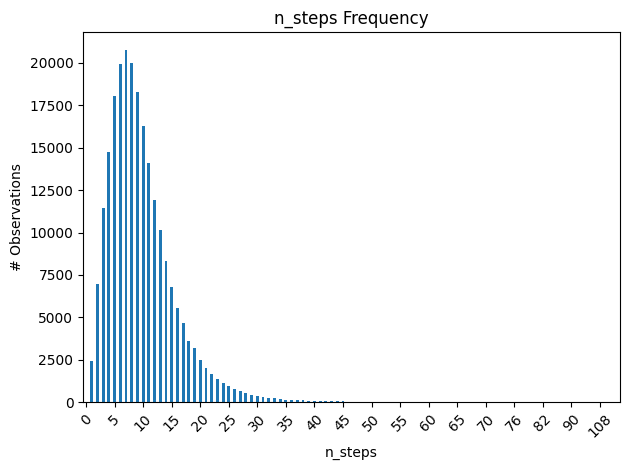

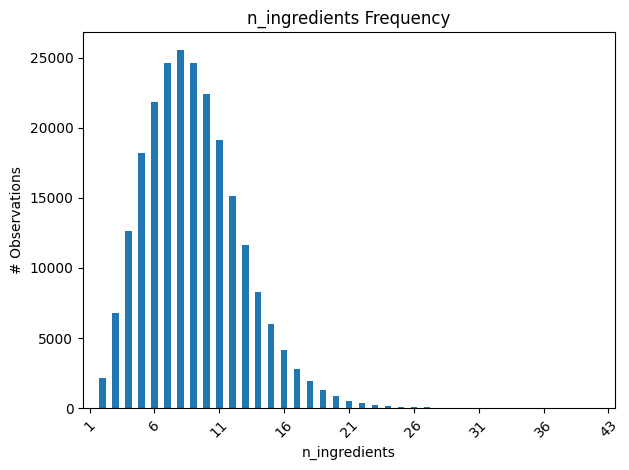

In [ ]:
for column in df_recipes.columns:
    if column not in ['n_ingredients', 'n_steps']:
        continue

    counts = df_recipes[column].value_counts(sort=False)
    counts = counts.sort_index()

    plot = counts.plot(kind='bar')
    plot.set_title(f'{column} Frequency')
    plot.set_xlabel(column)

    # Adjust x-axis ticks to show fewer labels
    tick_positions = range(len(counts))
    tick_labels = counts.index
    plot.set_xticks(tick_positions[::5])  # Display every other label
    plot.set_xticklabels(tick_labels[::5], rotation=45)  # Rotate for readability

    plot.set_ylabel('# Observations')
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

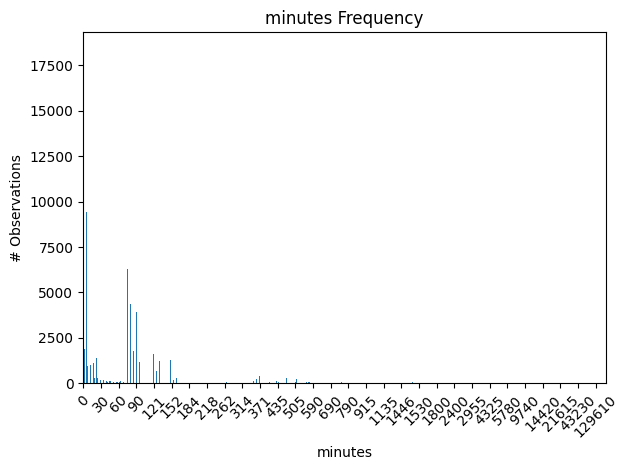

In [ ]:
for column in df_recipes.columns:
    if column not in ['minutes']:
      continue
    counts = df_recipes[column].value_counts(sort=False)
    counts = counts.sort_index()

    plot = counts.plot(kind='bar')
    plot.set_title(f'{column} Frequency')
    plot.set_xlabel(column)

    # Adjust x-axis ticks to show fewer labels
    tick_positions = range(len(counts))
    tick_labels = counts.index
    plot.set_xticks(tick_positions[::30])  # Display every other label
    plot.set_xticklabels(tick_labels[::30], rotation=45)  # Rotate for readability

    plot.set_ylabel('# Observations')
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

0         2005-09-16
1         2002-06-17
2         2005-02-25
3         2003-04-14
4         2002-10-25
             ...    
231632    2012-08-29
231633    2013-01-09
231634    2008-06-07
231635    2008-04-15
231636    2008-04-15
Name: submitted, Length: 231637, dtype: object


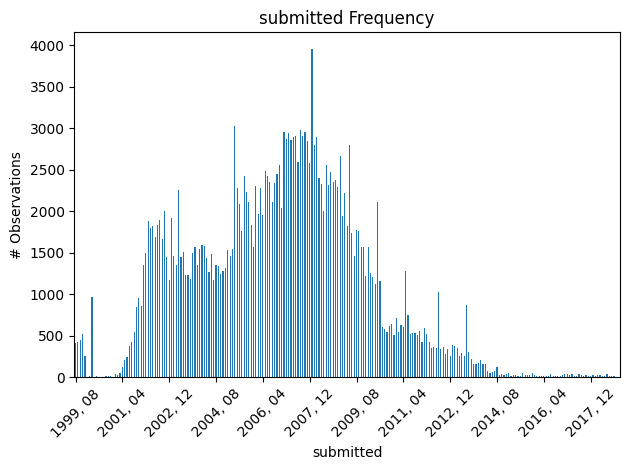

In [ ]:
print(df_recipes['submitted'])
for column in df_recipes.columns:
    if column not in ['submitted']:
      continue
    df_recipes['submitted'] = pd.to_datetime(df_recipes['submitted'])
    df_recipes[column] = df_recipes[column].dt.strftime('%Y, %m')
    counts = df_recipes[column].value_counts(sort=False)
    counts = counts.sort_index()

    plot = counts.plot(kind='bar')
    plot.set_title(f'{column} Frequency')
    plot.set_xlabel(column)

    # Adjust x-axis ticks to show fewer labels
    tick_positions = range(len(counts))
    tick_labels = counts.index
    plot.set_xticks(tick_positions[::20])  # Display every other label
    plot.set_xticklabels(tick_labels[::20], rotation=45)  # Rotate for readability

    plot.set_ylabel('# Observations')
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

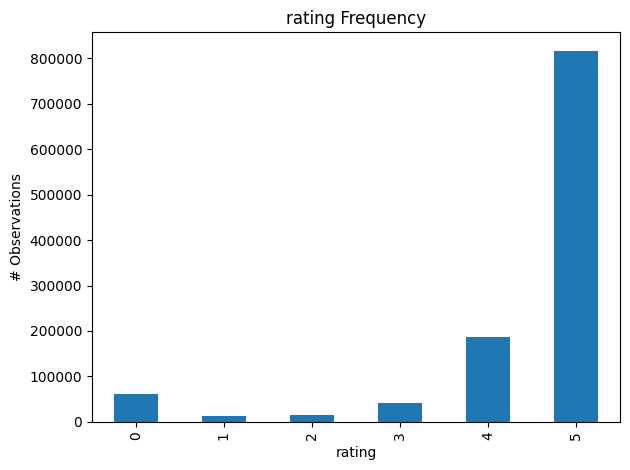

In [ ]:
for column in df_comments.columns:
    if column not in ['rating']:
      continue
    counts = df_comments[column].value_counts(sort=False)
    counts = counts.sort_index()

    plot = counts.plot(kind='bar')
    plot.set_title(f'{column} Frequency')
    plot.set_xlabel(column)

    # Adjust x-axis ticks to show fewer labels

    #plot.set_xticklabels(rotation=45)  # Rotate for readability

    plot.set_ylabel('# Observations')
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

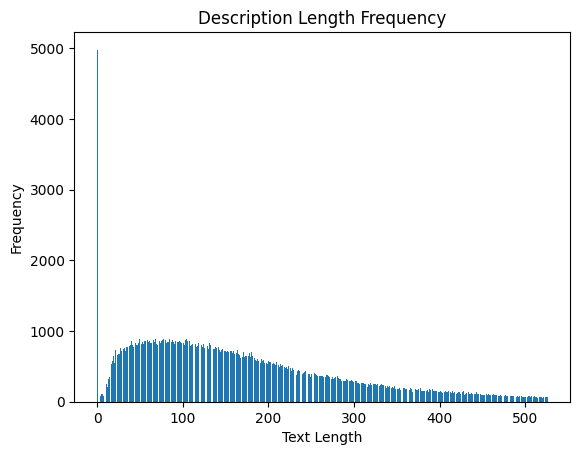

In [ ]:
len_freq = {}
Q1,Q3 = np.percentile(description_len_list,[25,75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
for len in description_len_list:
  if not (lower_bound <= len <= upper_bound):
    continue
  if len in len_freq:
    len_freq[len] += 1
  else:
    len_freq[len] = 1
values = list(len_freq.keys())
counts = list(len_freq.values())
plt.bar(values, counts)
plt.title('Description Length Frequency')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

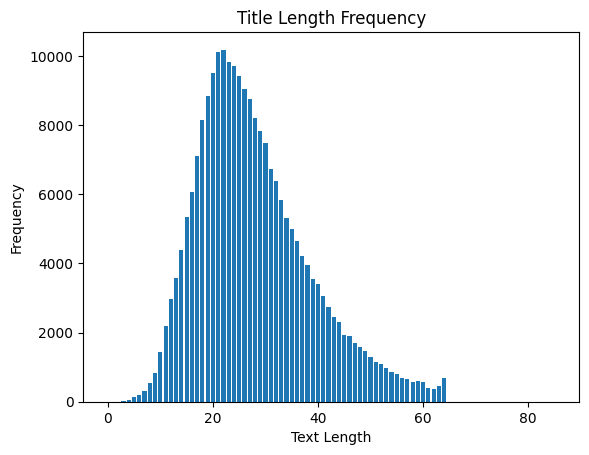

In [ ]:
len_freq = {}
for len in name_len_list:
  if len in len_freq:
    len_freq[len] += 1
  else:
    len_freq[len] = 1
values = list(len_freq.keys())
counts = list(len_freq.values())
plt.bar(values, counts)
plt.title('Title Length Frequency')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Feature processing and baseline models


In [ ]:
df_recipes = pd.read_csv(f"{path}/RAW_recipes.csv")
df_comments = pd.read_csv(f"{path}/RAW_interactions.csv")

In [ ]:
from tqdm import tqdm
tqdm.pandas()
df_recipes['description'] = df_recipes['description'].fillna('')
df_recipes['name'] = df_recipes['name'].fillna('')

recipe_dict = df_recipes.set_index('id').to_dict(orient='index')
lists = []
cols = ['rating', 'len_title', 'len_description', 'minutes', 'n_steps', 'n_ingredients']

for index, row in tqdm(df_comments.iterrows(), total=len(df_comments)):
    user_id = row['user_id']
    recipe_id = row['recipe_id']

    list = []
    list.append(row['rating'])
    recipe = recipe_dict.get(recipe_id)
    list.append(len(recipe['name']))
    list.append(len(recipe['description']))
    list.append(recipe['minutes'])
    list.append(recipe['n_steps'])
    list.append(recipe['n_ingredients'])
    lists.append(list)

df_combined = pd.DataFrame(lists, columns=cols)

100%|██████████| 1132367/1132367 [01:34<00:00, 12029.05it/s]


In [ ]:
df_combined.corr()

,rating,len_title,len_description,minutes,n_steps,n_ingredients
rating,1.000000,-0.007255,-0.006946,0.001053,-0.021169,-0.003529
len_title,-0.007255,1.000000,0.230701,-0.002919,0.152154,0.143193
len_description,-0.006946,0.230701,1.000000,0.001086,0.195346,0.116544
minutes,0.001053,-0.002919,0.001086,1.000000,-0.000438,-0.001059
n_steps,-0.021169,0.152154,0.195346,-0.000438,1.000000,0.380295
n_ingredients,-0.003529,0.143193,0.116544,-0.001059,0.380295,1.000000


## Baseline: basic logistic regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = df_combined.copy().drop(columns=['rating']).to_numpy()
y = df_combined['rating'].copy().to_numpy()

# normalize and then split to validate feature baseline
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and test splits
split_index = int(len(X) * 0.80)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

estimator = LinearRegression(fit_intercept=True)
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
print(selector.ranking_)

[False False False  True  True  True]
[2 3 4 1 1 1]


In [ ]:
print(selector.predict([X[10]]))
print(y[10])

# predict X_test and use y_test for ground truth

preds = selector.predict(X_test)
preds_neg = preds[preds < 4]
preds_pos = preds[preds >= 4]
print(len(preds_neg))
print(len(preds_pos))
accuracy = np.sum((preds >= 4) == (y_test >= 4)) / len(y_test)
print(f"Accuracy: {accuracy:.2%}")



[4.35602209]
5
11
226463
Accuracy: 88.75%


## Baseline: predicting all as "like"

In [ ]:
# Train and test splits
split_index = int(len(X) * 0.80)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

preds = []
for interaction in X_test:
  pred = 1
  preds.append(pred)

accuracy = np.sum(preds == (y_test >= 4)) / len(y_test)
print(f"Accuracy: {accuracy:.2%}")


Accuracy: 88.76%


# Main models

In [ ]:
from tqdm import tqdm
tqdm.pandas()
df_recipes['description'] = df_recipes['description'].fillna('')
df_recipes['name'] = df_recipes['name'].fillna('')

recipe_dict = df_recipes.set_index('id').to_dict(orient='index')
lists = []
cols = ['rating', 'len_title', 'len_description', 'minutes', 'n_steps', 'n_ingredients', 'k_tags']
user_tag = {}
user_list = []
review_score_map = {}
for index, row in tqdm(df_comments.iterrows(), total=len(df_comments)):
    user_id = row['user_id']
    recipe_id = row['recipe_id']

    list = []
    list.append(row['rating'])
    recipe = recipe_dict.get(recipe_id)
    list.append(len(recipe['name']))
    list.append(len(recipe['description']))
    list.append(recipe['minutes'])
    list.append(recipe['n_steps'])
    list.append(recipe['n_ingredients'])

    tags = recipe['tags']
    if user_id in user_tag:
      for tag in tags:
        if tag in user_tag[user_id]:
          user_tag[user_id][tag] += 1
        else:
          user_tag[user_id][tag] = 1
    else:
      user_tag[user_id] = {}
      for tag in tags:
        user_tag[user_id][tag] = 1

    user_list.append((user_id, recipe_id))
    review_score_map[(user_id, recipe_id)] = row['rating']
    lists.append(list)

# make k = 5 reduced tag map
top_5_tags_per_user = {}
for user in user_tag.keys():
  tags = user_tag[user]
  top_tags = dict(sorted(tags.items(), key=lambda x: x[1], reverse=True)[:5])
  top_5_tags_per_user[user] = top_tags

# get # of tags in each recipe that are in the users top tags
for entry, user_pair in zip(lists, user_list):
  entry.append(len([x for x in recipe_dict.get(user_pair[1])['tags'] if x in top_5_tags_per_user[user_pair[0]]]))

df_combined = pd.DataFrame(lists, columns=cols)

100%|██████████| 1132367/1132367 [04:00<00:00, 4701.21it/s]


In [ ]:
df_combined.corr()

,rating,len_title,len_description,minutes,n_steps,n_ingredients,k_tags
rating,1.000000,-0.007255,-0.006946,0.001053,-0.021169,-0.003529,0.092698
len_title,-0.007255,1.000000,0.230701,-0.002919,0.152154,0.143193,0.013142
len_description,-0.006946,0.230701,1.000000,0.001086,0.195346,0.116544,0.029667
minutes,0.001053,-0.002919,0.001086,1.000000,-0.000438,-0.001059,-0.002226
n_steps,-0.021169,0.152154,0.195346,-0.000438,1.000000,0.380295,-0.084007
n_ingredients,-0.003529,0.143193,0.116544,-0.001059,0.380295,1.000000,-0.070881
k_tags,0.092698,0.013142,0.029667,-0.002226,-0.084007,-0.070881,1.000000


# Factorization machine

In [ ]:
!pip3 install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808328 sha256=0b5712f0a4062ecb36c1dd5f0c348205dbf989b294d4bf91d820cc63eb816648
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [ ]:
from lightfm import LightFM
from scipy.sparse import coo_matrix
from sklearn.model_selection import train_test_split

X = coo_matrix(df_combined.values)
y = df_combined['rating'].copy().to_numpy()
y_binary = (y >= 4).astype(int)  # Example: Convert ratings into binary

# Ensure X and y are aligned properly by splitting rows
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Sparse matrix input (before converting to COO)
    y_binary,  # Correct binary target labels
    test_size=0.2,
    random_state=42
)

# Convert only AFTER splitting
X_train_coo = coo_matrix(X_train)
X_test_coo = coo_matrix(X_test)

# Initialize LightFM model (WARP loss is great for implicit feedback)
model = LightFM(loss='bpr', random_state=42)
model.fit(X_train_coo, epochs=1)

In [ ]:
import numpy as np

# Predict only for user-item pairs from X_test_coo
predictions = model.predict(X_test_coo.row, X_test_coo.col)

print("Predictions complete!")

# Check an example index match
print(f"Prediction: {predictions[2]}, Ground Truth: {y_test[2]}")

# Make sure you filter down to actual matching lengths
if len(predictions) != len(y_test):
    # Create a mapping from user-item pairs to actual y_test indices
    user_item_to_y_test_idx = {(X_test_coo.row[i], X_test_coo.col[i]): i for i in range(len(y_test))}

    # Filter out predictions that don't correspond to test pairs
    filtered_predictions = np.array([
        predictions[i] for i in range(len(predictions))
        if (X_test_coo.row[i], X_test_coo.col[i]) in user_item_to_y_test_idx
    ])

    print(f"Filtered Predictions Length: {len(filtered_predictions)}")
    print(f"y_test Length: {len(y_test)}")

    predictions = filtered_predictions

# Verify final lengths match before computing accuracy
print(len(predictions))
print(len(y_test))
print(predictions)
print(y_test)

# Binary conversion and accuracy calculation
predictions_binary = (predictions > 0).astype(int)
correct_predictions = (predictions_binary == y_test).sum()
accuracy = correct_predictions / len(y_test)
print(f"Accuracy: {accuracy:.4f}")

Predictions complete!
Prediction: -0.09203506261110306, Ground Truth: 1
Filtered Predictions Length: 226474
y_test Length: 226474
226474
226474
[-1.0498453   1.8772194  -0.09203506 ...  0.52858514  1.8508681
  1.8739102 ]
[1 1 1 ... 1 1 0]
Accuracy: 0.6203


ValueError: operands could not be broadcast together with shapes (1567271,) (226474,) 

## Logistic regression

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df_combined.copy().drop(columns=['rating']).to_numpy()
y = df_combined['rating'].copy().to_numpy()

# normalize and then split to validate feature baseline
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train and test splits
split_index = int(len(X) * 0.80)

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]
y_train = [1 if val >= 4 else 0 for val in y_train]
y_test = [1 if val >= 4 else 0 for val in y_test]



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[False False False  True  True  True]
[2 3 4 1 1 1]
118323
108151
Accuracy: 53.95%


In [ ]:
estimator = LogisticRegression(C=1, max_iter=250)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)
print(selector.support_)
print(selector.ranking_)

# predict X_test and use y_test for ground truth

preds = selector.predict(X_test)
preds_neg = preds[preds == 1]
preds_pos = preds[preds == 0]
print(len(preds_neg))
print(len(preds_pos))
accuracy = np.sum((preds) == (y_test)) / len(y_test)
print(f"Accuracy: {accuracy:.2%}")


[ True  True False  True  True  True]
[1 1 2 1 1 1]
226474
0
Accuracy: 88.76%


## BPR

In [ ]:
import scipy.sparse
import random
import implicit

userIDs,itemIDs = {},{}
shuffled_ratingsTrain = user_list.copy()
print(len(shuffled_ratingsTrain))
random.shuffle(shuffled_ratingsTrain)
for d in shuffled_ratingsTrain:
    u,i = d[0],d[1]
    if not u in userIDs: userIDs[u] = len(userIDs)
    if not i in itemIDs: itemIDs[i] = len(itemIDs)
nUsers,nItems = df_comments['user_id'].nunique(),len(df_recipes)
Xui = scipy.sparse.lil_matrix((nUsers, nItems))
for d in shuffled_ratingsTrain:
    Xui[userIDs[d[0]],itemIDs[d[1]]] = 1 if review_score_map[d] >= 4 else 0
Xui_csr = scipy.sparse.csr_matrix(Xui)

1132367


In [ ]:
model_bpr = implicit.bpr.BayesianPersonalizedRanking(factors=180)
model_bpr.fit(Xui_csr)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
sub_set_user_list_x = user_list[:int(.60 * len(user_list))]
sub_set_user_list_y = [review_score_map[x] for x in sub_set_user_list_x]
correct = 0
total = len(sub_set_user_list_x)
for i in tqdm(range(len(sub_set_user_list_x))):
  pred = np.abs(model_bpr.recommend(userIDs[sub_set_user_list_x[i][0]], Xui_csr[userIDs[sub_set_user_list_x[i][0]]], items=[itemIDs[sub_set_user_list_x[i][1]]])[1][0])
  if pred > 0.5 and sub_set_user_list_y[i] >=4:
    correct += 1
  elif sub_set_user_list_y[i] < 4:
    correct += 1
print(correct / total)

100%|██████████| 679420/679420 [06:21<00:00, 1782.09it/s]

1.0


In [ ]:
print(correct / total)
print(correct)

1.0
679420


In [ ]:
sub_set_user_list_x = user_list[:int(.60 * len(user_list))]
sub_set_user_list_y = [review_score_map[x] for x in sub_set_user_list_x]
correct = 0
total = len(sub_set_user_list_x)
preds = []
for i in tqdm(range(len(sub_set_user_list_x))):
  preds.append(model_bpr.recommend(userIDs[sub_set_user_list_x[i][0]], Xui_csr[userIDs[sub_set_user_list_x[i][0]]], items=[itemIDs[sub_set_user_list_x[i][1]]])[1][0])
preds = np.abs(preds)
for i in tqdm(range(len(sub_set_user_list_x))):
  pred = preds[i]
  if pred > 0.5 and sub_set_user_list_y[i] >=4:
    correct += 1
  elif sub_set_user_list_y[i] < 4 and pred <=  0.5:
    correct += 1

print(correct / total)

100%|██████████| 679420/679420 [00:01<00:00, 376971.68it/s]

0.9684142356716022


In [ ]:
sub_set_user_list_x = user_list[int(.60 * len(user_list)): int(.80 * len(user_list))]
sub_set_user_list_y = sub_set_user_list_y + [review_score_map[x] for x in sub_set_user_list_x]

  0%|          | 0/226473 [00:00<?, ?it/s]


AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
preds = preds.tolist()
for i in tqdm(range(len(sub_set_user_list_x))):
  preds.append(model_bpr.recommend(userIDs[sub_set_user_list_x[i][0]], Xui_csr[userIDs[sub_set_user_list_x[i][0]]], items=[itemIDs[sub_set_user_list_x[i][1]]])[1][0])

100%|██████████| 226473/226473 [02:12<00:00, 1715.03it/s]


In [ ]:
preds = np.abs(preds)

In [ ]:
correct_postive = 0
correct_negative = 0
total = len(preds)
for i in tqdm(range(len(preds))):
  pred = preds[i]
  if pred > 0.55 and sub_set_user_list_y[i] >= 4:
    correct_postive += 1
  elif sub_set_user_list_y[i] < 4 and pred <=  0.55:
    correct_negative += 1
print()
print((correct_postive + correct_negative) / total)
print(correct_postive)
print(correct_negative)


100%|██████████| 905893/905893 [00:00<00:00, 1539145.14it/s]


0.972229612106507
802716
78020
